# MAPT - Association results visualization: Forestplots

## GP2 NBA data release 7

## Project: Exploring MAPT-containing H1 and H2 haplotypes  in Parkinson's Disease across diverse populations 

Last Updated: MAY-2025

Notebook overview: In this notebook we employed the results from association (adjusted and unadjusted) analysis to create forest plots to facilitate visualization

### Load libraries

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import forestplot as fp
import numpy as np
import seaborn as sns



### Set WD and read data

In [25]:
# Set working directory
wd = "/YOUR/PATH/"
os.chdir(wd)




## assoc NOT adjusted Effect of H1 


In [26]:

# Load the data
assoc_H1 = pd.read_csv("All_LARGEPD_assocesults__flipped_2025.csv", header=0, sep=",")


In [27]:
assoc_H1

,POP,CHR,SNP,BP,A1,F_A,F_U,A2,CHISQ,P,OR,SE,L95,U95,N_Cases,N_controls
0,AAC,17,rs1052553,45996523,A,0.9187,0.9187,G,0.08829,7.664000e-01,1.0560,0.18360,0.7369,1.513,278,787
1,AFR,17,rs1052553,45996523,A,0.9848,0.9736,G,6.72300,9.517000e-03,1.7560,0.21990,1.1410,2.702,919,1607
2,AJ,17,rs1052553,45996523,A,0.7902,0.7500,G,5.51900,1.882000e-02,1.2560,0.09699,1.0380,1.518,1225,384
3,AMR,17,rs1052553,45996523,A,0.8553,0.8581,G,0.01411,9.055000e-01,0.9773,0.19300,0.6695,1.427,425,148
4,CAH,17,rs1052553,45996523,A,0.8737,0.8954,G,1.61100,2.044000e-01,0.8084,0.16780,0.5818,1.123,491,282
5,CAS,17,rs1052553,45996523,A,0.9391,0.9070,G,5.77900,1.622000e-02,1.5810,0.19200,1.0860,2.304,509,301
6,EAS,17,rs1052553,45996523,A,0.9988,0.9961,G,7.10500,7.685000e-03,3.2780,0.47180,1.3000,8.265,2538,2329
7,EUR,17,rs1052553,45996523,A,0.8229,0.7744,G,112.90000,2.290000e-26,1.3540,0.02859,1.2800,1.432,12992,5175
8,MDE,17,rs1052553,45996523,A,0.8407,0.8237,G,0.42990,5.120000e-01,1.1300,0.18610,0.7844,1.627,226,190
9,SAS,17,rs1052553,45996523,A,0.9481,0.9242,G,2.42600,1.193000e-01,1.4980,0.26080,0.8983,2.497,318,198


In [28]:
 #Define the desired order
desired_order = ["AFR","AAC", "AMR", "EUR", "AJ", "MDE", "CAS","SAS", "EAS",  "CAH", "LARGE-PD"]

# Convert 'column_name' to a categorical type with the specified order
assoc_H1['POP'] = pd.Categorical(assoc_H1['POP'], categories=desired_order, ordered=True)

# Sort the DataFrame based on the ordered column
assoc_H1 = assoc_H1.sort_values('POP')

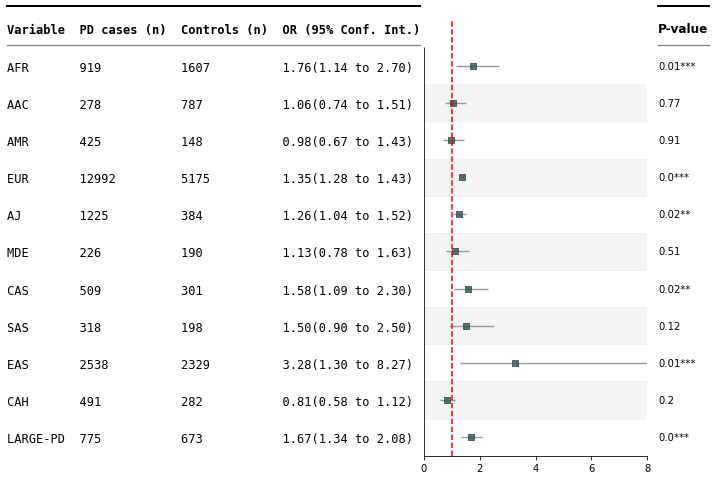

In [29]:
fp.forestplot(assoc_H1,  # the dataframe with results data
              estimate="OR",  # col containing estimated effect size 
              ll="L95", hl="U95",  # columns containing conf. int. lower and higher limits              
              varlabel="POP",  # column containing variable label
              capitalize="upper",  # Capitalize labels
              pval="P",
              starpval=True,
              annote=["N_Cases", "N_controls", "est_ci"],  # columns to report on left of plot
              annoteheaders=["PD cases (n)", "Controls (n)", "OR (95% Conf. Int.)"],  # ^corresponding headers
              xlim=(0, 8),
              table=True,
              color_alt_rows=True)

# Add a vertical line at x = 1
plt.axvline(x=1, color='red', linestyle='--')

# Show the plot
plt.show()


## glm  adjusted NO AGE (only sex and PCs) of H1 


In [30]:

# Load the data
noage_H1 = pd.read_csv("All_LARGEPD_noage_release7_flipped_2025.csv", header=0, sep=",")


In [31]:
 #Define the desired order
desired_order = ["AFR","AAC", "AMR", "EUR", "AJ", "MDE", "CAS","SAS", "EAS",  "CAH", "LARGE-PD"]

# Convert 'column_name' to a categorical type with the specified order
noage_H1['Population'] = pd.Categorical(noage_H1['Population'], categories=desired_order, ordered=True)

# Sort the DataFrame based on the ordered column
noage_H1 = noage_H1.sort_values('Population')

In [32]:
noage_H1

,Population,CHROM,POS,ID,REF,ALT,A1,FIRTH?,TEST,OBS_CT,OR,LOG(OR)_SE,L95,U95,Z_STAT,P,N_Cases,N_controls,Unnamed: 18,Unnamed: 19
1,AFR,17,45996523,rs1052553,G,A,A,N,ADD,2526,1.159830,0.235581,0.730915,1.84044,0.629390,5.290940e-01,919,1607,NaN,NaN
0,AAC,17,45996523,rs1052553,G,A,A,N,ADD,1065,1.198510,0.197485,0.813848,1.76499,0.916939,3.591740e-01,278,787,NaN,NaN
3,AMR,17,45996523,rs1052553,G,A,A,N,ADD,573,0.873557,0.197838,0.592777,1.28733,-0.683295,4.944200e-01,425,148,NaN,NaN
7,EUR,17,45996523,rs1052553,G,A,A,N,ADD,18167,1.323330,0.028890,1.250480,1.40042,9.697000,3.100000e-22,12992,5175,NaN,NaN
2,AJ,17,45996523,rs1052553,G,A,A,N,ADD,1609,1.273270,0.098822,1.049070,1.54539,2.444700,1.449730e-02,1225,384,NaN,NaN
8,MDE,17,45996523,rs1052553,G,A,A,N,ADD,416,1.171040,0.207776,0.779313,1.75967,0.759908,4.473100e-01,226,190,NaN,NaN
5,CAS,17,45996523,rs1052553,G,A,A,N,ADD,810,1.494450,0.194544,1.020670,2.18816,2.065130,3.891030e-02,509,301,NaN,NaN
9,SAS,17,45996523,rs1052553,G,A,A,N,ADD,516,1.326660,0.262850,0.792537,2.22074,1.075370,2.822080e-01,318,198,NaN,NaN
6,EAS,17,45996523,rs1052553,G,A,A,N,ADD,4867,2.362050,0.569059,0.774292,7.20566,1.510440,1.309310e-01,2538,2329,NaN,NaN
4,CAH,17,45996523,rs1052553,G,A,A,N,ADD,773,0.890615,0.178115,0.628171,1.26271,-0.650382,5.154450e-01,491,282,NaN,NaN


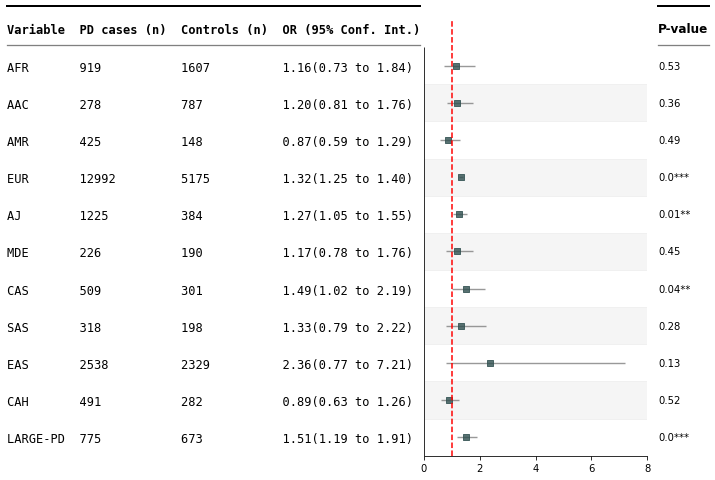

In [33]:
fp.forestplot(
    noage_H1,  # the dataframe with results data
    estimate="OR",  # col containing estimated effect size 
    ll="L95", hl="U95",  # columns containing conf. int. lower and higher limits              
    varlabel="Population",  # column containing variable label
    capitalize="upper",  # Capitalize labels
    pval="P",
    starpval=True,
    annote=["N_Cases", "N_controls", "est_ci"],  # columns to report on left of plot
    annoteheaders=["PD cases (n)", "Controls (n)", "OR (95% Conf. Int.)"],  # ^corresponding headers
    table=True,
    color_alt_rows=True,
    xlim=(0, 8)  # Set x-axis to start at 0 and end at 4
)

# Add a vertical line at x = 1
plt.axvline(x=1, color='red', linestyle='--')

# Show the plot
plt.show()


## glm adjusted Effect of H1 


In [34]:

# Load the data
glm_Adjusted_H1 = pd.read_csv("All_LARGEPD_glmresults_release7_flipped_2025.csv", header=0, sep=",")


In [35]:
glm_Adjusted_H1

,Population,CHROM,POS,ID,REF,ALT,A1,FIRTH?,TEST,OBS_CT,OR,LOG(OR)_SE,L95,U95,Z_STAT,P,N_Cases,N_controls
0,AAC,17,45996523,rs1052553,G,A,A,N,ADD,914,0.972269,0.216666,0.635857,1.48667,-0.129797,8.967270e-01,209,705
1,AFR,17,45996523,rs1052553,G,A,A,N,ADD,1050,1.919020,0.390679,0.892346,4.12692,1.668420,9.523300e-02,181,869
2,AJ,17,45996523,rs1052553,G,A,A,N,ADD,1343,1.252680,0.131217,0.968608,1.62007,1.716890,8.599870e-02,1141,202
3,AMR,17,45996523,rs1052553,G,A,A,N,ADD,425,0.854165,0.244671,0.528783,1.37977,-0.644254,5.194110e-01,327,98
4,CAH,17,45996523,rs1052553,G,A,A,N,ADD,673,1.051770,0.199535,0.711336,1.55512,0.252945,8.003100e-01,405,268
5,CAS,17,45996523,rs1052553,G,A,A,N,ADD,639,1.425210,0.229744,0.908493,2.23583,1.542250,1.230140e-01,411,228
6,EAS,17,45996523,rs1052553,G,A,A,N,ADD,2495,1.531180,0.649589,0.428644,5.46963,0.655863,5.119120e-01,1233,1262
7,EUR,17,45996523,rs1052553,G,A,A,N,ADD,12757,1.334860,0.036491,1.242730,1.43383,7.915170,2.470000e-15,9725,3032
8,MDE,17,45996523,rs1052553,G,A,A,N,ADD,308,1.232220,0.268250,0.728375,2.08461,0.778455,4.363010e-01,122,186
9,SAS,17,45996523,rs1052553,G,A,A,N,ADD,253,1.647530,0.448354,0.684218,3.96710,1.113580,2.654590e-01,132,121


##### Make forest plot

In [36]:
 #Define the desired order
desired_order = ["AFR","AAC", "AMR", "EUR", "AJ", "MDE", "CAS","SAS", "EAS",  "CAH", "LARGE-PD"]

# Convert 'column_name' to a categorical type with the specified order
glm_Adjusted_H1['Population'] = pd.Categorical(glm_Adjusted_H1['Population'], categories=desired_order, ordered=True)

# Sort the DataFrame based on the ordered column
glm_Adjusted_H1 = glm_Adjusted_H1.sort_values('Population')

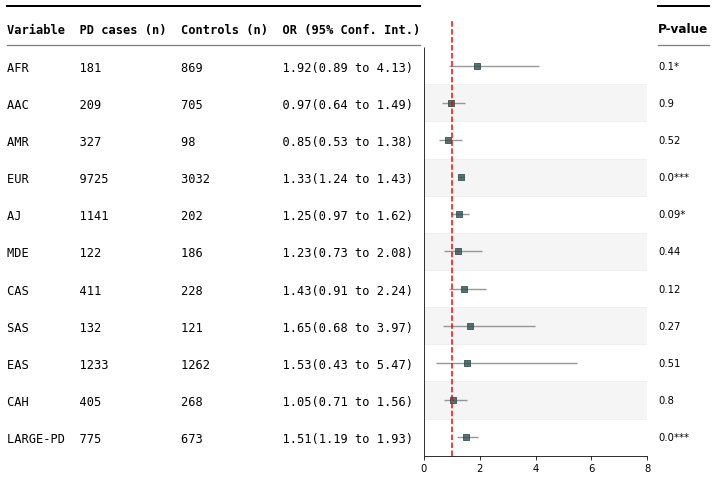

In [37]:

fp.forestplot(glm_Adjusted_H1,  # the dataframe with results data
              estimate="OR",  # col containing estimated effect size 
              ll="L95", hl="U95",  # columns containing conf. int. lower and higher limits              
              varlabel="Population",  # column containing variable label
              capitalize="upper",  # Capitalize labels
              pval="P",
              starpval=True,
              annote=["N_Cases", "N_controls", "est_ci"],  # columns to report on left of plot
              annoteheaders=["PD cases (n)", "Controls (n)", "OR (95% Conf. Int.)"],  # ^corresponding headers
              table=True,
              xlim=(0, 8),
              color_alt_rows=True)

# Add a vertical line at x = 1
plt.axvline(x=1, color='red', linestyle='--')

# Show the plot
plt.show()
